In [1]:
from pathlib import Path

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from gambit.kmers import index_to_kmer

from gambit.signatures.hdf5 import HDF5Signatures

In [51]:
%matplotlib inline

## Load data

In [4]:
sigs = HDF5Signatures.open('tmp/gambit/signatures/11-ATGAC.h5')

## Funcs

In [37]:
def get_kmer_nuccodes(index, out):
    k = len(out)
    for i in reversed(range(k)):
        out[i] = index & 0b11
        index >>= 2
    return out

In [56]:
def count_nuccodes(sig, k, counts=None):
    if counts is None:
        counts = np.zeros((4, k), dtype=int)
        
    codes = np.zeros(k, dtype=np.uint8)
    
    for index in sig:
        get_kmer_nuccodes(index, codes)
        counts[codes, range(k)] += 1
        
    return counts

## ?

In [26]:
k = 11
a = np.zeros(k, dtype=np.uint8)

<AxesSubplot:>

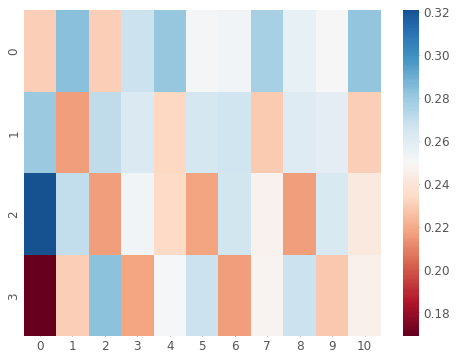

In [58]:
_sig = sigs[0]
counts = get_nuc_counts(_sig, k)
sns.heatmap(counts / len(_sig), cmap='RdBu', center=.25)

<AxesSubplot:>

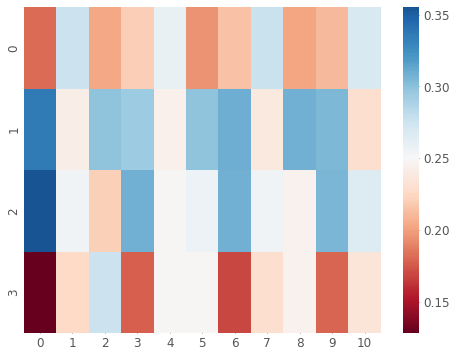

In [60]:
_sig = sigs[1]
counts = get_nuc_counts(_sig, k)
sns.heatmap(counts / len(_sig), cmap='RdBu', center=.25)